In [ ]:
# ✅ INSTALACIÓN DE UQpy
!pip install UQpy
from UQpy.dimension_reduction import SnapshotPOD

In [ ]:
# Install FEniCS
try:
    from dolfin import *
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-release-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh";
    from dolfin import *

--2025-05-07 13:17:42--  https://fem-on-colab.github.io/releases/fenics-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.110.153, 185.199.108.153, 185.199.111.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4180 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.08K  --.-KB/s    in 0s      

2025-05-07 13:17:42 (39.5 MB/s) - ‘/tmp/fenics-install.sh’ saved [4180/4180]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/a51d633e/releases/pybi

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Download data files
!mkdir -p dataii
![ -f data/elastic_block.xml ] || wget https://github.com/RBniCS/RBniCS/raw/master/tutorials/02_elastic_block/data/elastic_block.xml -O data/elastic_block.xml #Datos de la malla
![ -f data/elastic_block_facet_region.xml ] || wget https://github.com/RBniCS/RBniCS/raw/master/tutorials/02_elastic_block/data/elastic_block_facet_region.xml -O data/elastic_block_facet_region.xml
![ -f data/elastic_block_physical_region.xml ] || wget https://github.com/RBniCS/RBniCS/raw/master/tutorials/02_elastic_block/data/elastic_block_physical_region.xml -O data/elastic_block_physical_region.xml

--2025-05-07 13:20:04--  https://github.com/RBniCS/RBniCS/raw/master/tutorials/02_elastic_block/data/elastic_block.xml
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RBniCS/RBniCS/master/tutorials/02_elastic_block/data/elastic_block.xml [following]
--2025-05-07 13:20:04--  https://raw.githubusercontent.com/RBniCS/RBniCS/master/tutorials/02_elastic_block/data/elastic_block.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 420977 (411K) [text/plain]
Saving to: ‘data/elastic_block.xml’

data/elastic_block. 100%[===================>] 411.11K  --.-KB/s    in 0.04s   

2025-05-07 13:20:04 (10.8 MB/

In [ ]:
mesh = Mesh("data/elastic_block.xml")
subdomains = MeshFunction("size_t", mesh, "data/elastic_block_physical_region.xml")
boundaries = MeshFunction("size_t", mesh, "data/elastic_block_facet_region.xml")

In [ ]:
V = VectorFunctionSpace(mesh, "Lagrange", 1) #Grado de la interpolación

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_4f750817ecc896f3bedcb4ff8c9f3352153b1b38

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00273585 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.306433 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_3801828c0f66b7190a7fd5819465b3d5b34b9149

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.002002 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0100257 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation

In [ ]:
import random
training_set = [(random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)) for i in range(50)]

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_7d3b8ac376013b096cd7166b494a613964c87529

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_17d5bd7e022a45e71c9f390bd00f3f09885a1fd0

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00236988 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0109446 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_0bb6ea8295a9d49109447a98e18601bb13d2b05f

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00253439 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0109375 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_3720490578293ae8ad5feabedc46584f48fda4c4

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00264955 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.00931406 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INF

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_4c2fb2ed7b20c523c04c415f99937ec142aec392

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'Vector<2 x CG1(?,?)>'
  Unique sub elements:       'Vector<2 x CG1(?,?)>, CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 0
INFO:FFC:  quadrature_degree: 0
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.111904 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:----------------------------------------

(0.8667946411033427, 0.8477186428766206, 0.8464766481400294)


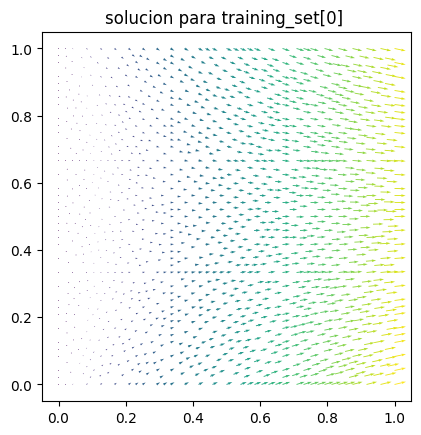

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_73e370b1c5fd208e65a1a2ee37a892f6e3946770

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_16b04c591d130d7bc47ad18fd477a168dc8e8f62

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_99e46af6b01068d6813f86a6610017201d1db376

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_dd0156942d3c1dca18cb5a09d0c522510be49ac4

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_108de59e6d02467f092ddaf5e548a5b0e9fcdeb8

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_7ed7d4660e6f32f989dedf6825c19edb78056dc5

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_1414982a867a068eb5356f0478bfbbc0a37937ec

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_5ff2d00a09d166d5944c6224f83b5d2c7b7fabb4

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_48fdfca2db88823775393cbbbe2f4a36ab50808c

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_4702c25bb4f1d7c17a6488bd7c263e6cf45dd67c

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_0a491baf680d38cf3eb5106c8d1c73b53988ce4e

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_7c425659ce100788e91b31f3853aa2fcee996934

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_cf16dac6fb949f01ccab38a32915b156df518f67

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_ac5281c0a02569b2c362b71bc85dc84bc8df75fb

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_239b1e226c5b5f421ac2f08dc5d14e73582ea569

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_4f77ba0dd6bea42c06b811df6b25d051b637db65

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_c724de70b00d83cdd03766739b196e514bb0ff75

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_3eef964fa88c15fabe62fc52064a10dbbd4d1bee

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_5f9b023fa62f34133564401f9896a6c355f0ade7

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_bb706caf99b31c4c44ad357cb48530fb64382901

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_3a51daa9330c61dd9705a27cbe4b457a723fb86f

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_46b9a9d97a6bad3a1c5d6b85794728e5382a6641

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_cc2597db53599b99dcb17efcb62e50451a0eea5d

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_6a89772a14398b59818eab9f919ad1ca0c99f112

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_64096a2bff4714a99d5da3d1fc91546b859a317b

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_cf47d0e6e030c216df2f45ee934b0ec8dda076bd

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_1338ee75f6805846bb915beee727dfa41ae898fd

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_8a9c3c1293bde1000db61a6d77bc92d1c3eea8d3

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_8bc595144bee5300d2b9190897159d4221c0ea26

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_c6a8f970390426ed2bc386a271cf4d84432114f1

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_df4fd761a9dd840b1a35c1a2d128376587d2880e

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_2368891aa5f5bb08d2949ef009e94d1b4d07ea16

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_d6ae284abeff67be13eadefe70ae67c536ec0a36

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_357cc8832ad004118b333ca5e3f18f2855d7499e

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_f09cce778c44445702e2098568e76005fd7578e8

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_ec209a95ca7fe51154bbf5ab0c52f431e43c8fea

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_4ec84f28c7ec0196d6764ab68cc802e1963eeaf2

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_994c1c59c550266805d52110d5a4f669f44842e0

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_eacc83b9b478495f88374dbdf23b3effc45b09a1

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_c89ccecd5960f65f96cd39122cef813656967ef1

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_ce06f817ac0d55ca5303a8c1baf3adbc6db6db20

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_cb1be86a2d80563379118a1d3a9955e1d47f34f7

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_8d645aa478824dc0429f5e6694efb1cb6336c9ff

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_ce4f14d4dded7e7eb83cfe7185fe0f01e012eb1c

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_eb40b32c7d8827ad439af35094d129ea97036a6b

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_3e62d51cb2f11846539a423769cfb08f73cb2be9

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_f3049ffbd1605cba42ee0c5d024a23f08542a5e5

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_49bdd6c1030466b451b5e67ff1309372a5daf125

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_01caae48f83ca7833cf929fc6aaf6fb9438e179c

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 5
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_13]'
  Unique elements:                     'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>'
  Unique sub elements:                 'Vector<2 x CG1(?,?)>, Vector<2 x R0(?,?)>, C
                                       G1(?,?), R0(?,?)'
  

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.02802792 -0.00208792 -0.00875005 ...  0.00624232  0.0236911
   0.01556251]
 ...
 [-0.1511962  -0.50621863 -0.11418178 ... -0.33706963  0.782613
   0.42361585]
 [ 0.72089673  0.62899126  0.04815165 ...  0.58625696 -0.720263
  -0.32363087]
 [-0.16042912 -0.50538749 -0.10926244 ... -0.33820138  0.77030991
   0.41655492]]


In [ ]:
snapshots_matrix = np.zeros((V.dim(), len(training_set)))

# Condiciones de borde
def left_boundary(x, on_boundary):
    return on_boundary and near(x[0], 0.0)

f = Constant((1.0, 0.0))
E = 1.0 #Esto es mu_p (vendría a ser el valor de la densidad de el subloque 9?)
nu = 0.3
lambda_1 = E * nu / ((1.0 + nu) * (1.0 - 2.0 * nu))
lambda_2 = E / (2.0 * (1.0 + nu))


bc0 = DirichletBC(V, Constant((0.0, 0.0)), left_boundary)
bcs = [bc0]

# Definir medida para integración
dx = Measure("dx")(subdomain_data=subdomains)
ds = Measure("ds")(subdomain_data=boundaries) #ds es para integrar solo en el borde del dominio
i=0
for mu in training_set:


    u = TrialFunction(V)
    v = TestFunction(V)
    a = (2.0 * lambda_2 * inner(sym(grad(u)), sym(grad(v))) + lambda_1 * tr(sym(grad(u))) * tr(sym(grad(v)))) * dx
    L = mu[0]*inner(f,v)* ds(2) + mu[1]*inner(f,v)* ds(3) + mu[2]*inner(f,v)*ds(4)

    # Resolver
    sol = Function(V)
    solve(a == L, sol, bcs);

    snapshots_matrix[:,i]=sol.vector().get_local()
    i+=1

    if i==1:
      print(mu)
      plot(sol, title="solucion para training_set[0] ")
      plt.show()


print(snapshots_matrix)

In [ ]:
snapshots_matrix_3d = np.expand_dims(snapshots_matrix, axis=1)


In [ ]:
n_modos = 3  # Número de modos que deseas conservar
pod = SnapshotPOD(solution_snapshots=snapshots_matrix_3d, n_modes=n_modos)

# ✅ OBTENER RESULTADOS
U = pod.reconstructed_solution
print(U.shape)

W= pod.reduced_solution
print(W)
print(W.shape)

(2692, 1, 50)
[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 8.98392061e-02 -6.63837745e-02  1.88498161e-03]]

 ...

 [[-3.21322866e-01 -2.92128857e+00  3.75589783e-01]]

 [[ 2.10794165e+00  2.97755279e+00 -7.83739569e-01]]

 [[-3.50544220e-01 -2.88666459e+00  3.64180718e-01]]]
(2692, 1, 3)


In [ ]:
min_error = float("inf")
arg_min = 0

target = pod.reduced_solution[:, :, 1]

for i in range(snapshots_matrix_3d.shape[2]):
    diff = target - snapshots_matrix_3d[:, :, i]
    error = np.linalg.norm(diff)
    if error < min_error:
        min_error = error
        arg_min = i

print("Snapshot más parecido al reducido 1:", arg_min)
print("Error:", min_error)

print(W[:,:,1])
print(U[:,:,1])
print(snapshots_matrix_3d[:,:,1])
print(snapshots_matrix[:,1])

Snapshot más parecido al reducido 1: 3
Error: 43.13167639550951
[[ 0.        ]
 [ 0.        ]
 [-0.06638377]
 ...
 [-2.92128857]
 [ 2.97755279]
 [-2.88666459]]
[[ 0.        ]
 [ 0.        ]
 [-0.00208792]
 ...
 [-0.50621863]
 [ 0.62899126]
 [-0.50538749]]
[[ 0.        ]
 [ 0.        ]
 [-0.00208792]
 ...
 [-0.50621863]
 [ 0.62899126]
 [-0.50538749]]
[ 0.          0.         -0.00208792 ... -0.50621863  0.62899126
 -0.50538749]


In [ ]:
i = 10  # índice de snapshot a verificar
original = snapshots_matrix_3d[:, :, i]
reconstruction = U[:, :, i]

print(np.allclose(original, reconstruction))  # debería ser True si reconstrucción es buena


True


In [ ]:
print(pod.phi)
print(pod.phi.shape)

[[ 0.32632346  0.02041946  0.03543791 ...  0.07089898  0.07089898
  -0.01536279]
 [ 0.11153464  0.18845524  0.21340337 ...  0.0127676   0.0127676
  -0.04552593]
 [-0.07430435  0.02671425 -0.15979519 ... -0.06334191 -0.06334191
  -0.00843748]
 ...
 [ 0.14608042  0.104893    0.04337728 ... -0.03608913 -0.03608913
   0.10124343]
 [ 0.06837353 -0.26121043  0.11052469 ...  0.0140891   0.0140891
   0.02145636]
 [ 0.06127025 -0.15144668  0.00235344 ...  0.11554083  0.11554083
  -0.01678071]]
(50, 50)


In [ ]:
print(pod.U)
print(pod.U.shape)

[[ 0.          0.          0.02802792 ... -0.1511962   0.72089673
  -0.16042912]
 [ 0.          0.         -0.00208792 ... -0.50621863  0.62899126
  -0.50538749]
 [ 0.          0.         -0.00875005 ... -0.11418178  0.04815165
  -0.10926244]
 ...
 [ 0.          0.          0.00624232 ... -0.33706963  0.58625696
  -0.33820138]
 [ 0.          0.          0.0236911  ...  0.782613   -0.720263
   0.77030991]
 [ 0.          0.          0.01556251 ...  0.42361585 -0.32363087
   0.41655492]]
(50, 2692)


In [ ]:
pod = SnapshotPOD(solution_snapshots=snapshots_matrix_3d, reconstruction_percentage=99.5)

# ✅ OBTENER RESULTADOS
U = pod.reconstructed_solution
print(U.shape)

W= pod.reduced_solution
print(W)
print(W.shape)

(2692, 1, 50)
[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 8.98392061e-02 -6.63837745e-02  1.88498161e-03]]

 ...

 [[-3.21322866e-01 -2.92128857e+00  3.75589783e-01]]

 [[ 2.10794165e+00  2.97755279e+00 -7.83739569e-01]]

 [[-3.50544220e-01 -2.88666459e+00  3.64180718e-01]]]
(2692, 1, 3)


In [ ]:
i = 10  # índice de snapshot a verificar
original = snapshots_matrix_3d[:, :, i]
reconstruction = U[:, :, i]

print(np.allclose(original, reconstruction))  # debería ser True si reconstrucción es buena

True


In [ ]:
def POD_snapshot_matrix(snapshots_matrix, fidelidad):
  #Pasar la matriz 2d a una 3d
  snapshots_matrix_3d = np.expand_dims(snapshots_matrix, axis=1)
  pod = SnapshotPOD(solution_snapshots=snapshots_matrix_3d, reconstruction_percentage=fidelidad)
  W= pod.reduced_solution
  # Elimina la dimensión de tamaño 1
  W_reducida = np.squeeze(W, axis=1)
  return W_reducida


In [ ]:
reduced_basis_matrix=POD_snapshot_matrix(snapshots_matrix, 99.5)
print(reduced_basis_matrix)
print(reduced_basis_matrix.shape)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.98392061e-02 -6.63837745e-02  1.88498161e-03]
 ...
 [-3.21322866e-01 -2.92128857e+00  3.75589783e-01]
 [ 2.10794165e+00  2.97755279e+00 -7.83739569e-01]
 [-3.50544220e-01 -2.88666459e+00  3.64180718e-01]]
(2692, 3)


In [ ]:
# Suponemos que estas variables ya están definidas:
# reduced_basis_matrix: (n_vertices, N)
# snapshots_matrix: (n_vertices, n_snapshots)
# i: índice del snapshot a usar
i=0
# Vector objetivo
b = snapshots_matrix[:, i]

# Resolver por mínimos cuadrados
alpha, residuals, rank, s = np.linalg.lstsq(reduced_basis_matrix, b, rcond=None)
print(alpha)
print(residuals)
print(rank)
print(s)
# alpha es el vector de coeficientes que minimiza el residuo


[0.32632346 0.02041946 0.03543791]
[4.6028579e-29]
3
[59.91750438 49.45676225 10.31601996]


In [ ]:
max_err=0
arg_max=-1
for i in range(len(training_set)):
    # Vector objetivo
    b = snapshots_matrix[:, i]

    # Resolver por mínimos cuadrados
    alpha, residuals, rank, s = np.linalg.lstsq(reduced_basis_matrix, b, rcond=None)

    if residuals[0]>max_err:
      max_err=residuals[0]
      arg_max=i

print(max_err)
print(arg_max)

7.157940911124611e-29
15


# Conclusiones

Parece bien la matriz de base reducida que encuentra este algoritmo. La forma de chequearlo es cual es el mayor residuo que genera la solución por minimos cuadrados al problema

RB_matrix * $\alpha$ = $u(\mu_i)$

Y vemos que los resiudos son del orden de $10^{-29}$. Con esto podríamos afirmar que la base reducida es correcta.


## A tener en cuenta

Si bien parece funcionar bien al elegir la fidelidad de 99% en vez de 99.5% pasan cosas raras

In [ ]:
reduced_basis_matrix=POD_snapshot_matrix(snapshots_matrix, 99)
print(reduced_basis_matrix)
print(reduced_basis_matrix.shape)

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.08983921 -0.06638377]
 ...
 [-0.32132287 -2.92128857]
 [ 2.10794165  2.97755279]
 [-0.35054422 -2.88666459]]
(2692, 2)


In [ ]:
max_err=0
arg_max=-1
residuos=[]
for i in range(len(training_set)):
    # Vector objetivo
    b = snapshots_matrix[:, i]

    # Resolver por mínimos cuadrados
    alpha, residuals, rank, s = np.linalg.lstsq(reduced_basis_matrix, b, rcond=None)
    residuos.append(residuals[0])
    if residuals[0]>max_err:
      max_err=residuals[0]
      arg_max=i

print(max_err)
print(arg_max)
print(residuos)
print("Promedio: ", np.mean(residuos))

10.134422439827121
7
[0.1336474013948906, 4.846485355712683, 2.717388736545256, 0.5344734268999347, 0.008396543601327237, 0.8904469600068623, 1.3473945875304094, 10.134422439827121, 0.7729491197986432, 0.4079235801007936, 1.33227247037132, 0.045255571339154824, 4.770991343056099, 0.03071069236752388, 0.3522268873020489, 0.23040169373148248, 1.081498425691889, 0.670210135437961, 2.453584214323695, 0.6463832732125376, 0.38820568084276746, 0.6847848234578888, 0.04615210077288393, 2.592398672860823, 0.3651327784917546, 1.3895845730034042, 2.1568654587103873, 6.437487910925879, 7.157995652419919, 2.1975094740543946, 6.269949312441264, 0.12123916711048559, 1.7439912753357423, 3.323941020802989, 2.743179312091947, 1.9717602805108703, 4.0351313216745375, 0.26749558613723384, 9.16799906827654, 3.1332229242876304, 0.00758315896705443, 8.462471592968386, 0.32232903202193, 0.03757433037615864, 5.52514457502748, 0.8085362556127429, 0.15471222051541672, 0.20023911171897785, 1.2999989370937335, 0.000

In [ ]:
pod = SnapshotPOD(solution_snapshots=snapshots_matrix_3d, reconstruction_percentage=99.1338)

# ✅ OBTENER RESULTADOS
U = pod.reconstructed_solution
print(U.shape)

W= pod.reduced_solution
print(W)
print(W.shape)

i = 10  # índice de snapshot a verificar
original = snapshots_matrix_3d[:, :, i]
reconstruction = U[:, :, i]

print(np.allclose(original, reconstruction))  # debería ser True si reconstrucción es buena

(2692, 1, 50)
[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 8.98392061e-02 -6.63837745e-02  1.88498161e-03]]

 ...

 [[-3.21322866e-01 -2.92128857e+00  3.75589783e-01]]

 [[ 2.10794165e+00  2.97755279e+00 -7.83739569e-01]]

 [[-3.50544220e-01 -2.88666459e+00  3.64180718e-01]]]
(2692, 1, 3)
True


In [ ]:
pod = SnapshotPOD(solution_snapshots=snapshots_matrix_3d, reconstruction_percentage=99.1337)

# ✅ OBTENER RESULTADOS
U = pod.reconstructed_solution
print(U.shape)

W= pod.reduced_solution
print(W)
print(W.shape)

i = 10  # índice de snapshot a verificar
original = snapshots_matrix_3d[:, :, i]
reconstruction = U[:, :, i]

print(np.allclose(original, reconstruction))  # debería ser True si reconstrucción es buena

(2692, 1, 50)
[[[ 0.          0.        ]]

 [[ 0.          0.        ]]

 [[ 0.08983921 -0.06638377]]

 ...

 [[-0.32132287 -2.92128857]]

 [[ 2.10794165  2.97755279]]

 [[-0.35054422 -2.88666459]]]
(2692, 1, 2)
False


In [ ]:
reduced_basis_matrix=POD_snapshot_matrix(snapshots_matrix, 99.9999999999999)
print(reduced_basis_matrix)
print(reduced_basis_matrix.shape)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.98392061e-02 -6.63837745e-02  1.88498161e-03]
 ...
 [-3.21322866e-01 -2.92128857e+00  3.75589783e-01]
 [ 2.10794165e+00  2.97755279e+00 -7.83739569e-01]
 [-3.50544220e-01 -2.88666459e+00  3.64180718e-01]]
(2692, 3)


In [ ]:
reduced_basis_matrix=POD_snapshot_matrix(snapshots_matrix, 99.9999999999999999)
print(reduced_basis_matrix)
print(reduced_basis_matrix.shape)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.98392061e-02 -6.63837745e-02  1.88498161e-03 ... -1.04930079e-17
  -2.22374086e-17  4.22407882e-17]
 ...
 [-3.21322866e-01 -2.92128857e+00  3.75589783e-01 ...  4.01227233e-16
   1.08931617e-16  9.82850002e-16]
 [ 2.10794165e+00  2.97755279e+00 -7.83739569e-01 ... -6.95137023e-16
  -3.89430178e-16 -6.91932617e-16]
 [-3.50544220e-01 -2.88666459e+00  3.64180718e-01 ...  4.53200762e-16
   2.04527256e-16  8.38979699e-16]]
(2692, 16)


## Observaciones

Vemos que si la fidelidad es menor a 99.1338% esto no fucniona bien per si es mayor o igual si. También si se acerca demasiado a 100% la base reducida queda inecesariamente grande. Hay que seguir haciendo experimentos pero se me ocurren 2 opciones para solcionar esto:

* Poner un bucle adentro de la función de snapshots que hasta que la recontrucción sea fiel aumente la fidelidad

* Hacer SVD a la matriz de snapshots para indicarle nosotros de cuanto debe ser la base reducida

Esto puede llevar más tiempo pero considerando que es offline puede servir